In [1]:
# from ThOPqkdsim.sim2 import *
# from ThOPqkdsim.sim3 import *
from ThOPqkdsim.sim6 import *
import numpy as np

In [2]:
def run_simulation():
    """
    Run a comprehensive BB84 simulation and plot the results.

    """
    print("Running BB84 QKD Protocol Simulation...")
    
    # Initial parameters from the document
    time_window = 1e-9
    alice_detector_efficiency = 0.80
    bob_detector_efficiency = 0.80
    alice_channel_base_efficiency = 1.00  # Source is at Alice
    bob_channel_base_efficiency = 0.3913
    dark_count_rate = 1000  # 1000 counts per second
    distance = 10  # kilometers
    
    # Define μ range for QBER vs mu and SKR vs mu plots
    mu_values = np.linspace(0.01, 1.0, 20)
    
    # Plot QBER vs μ at the fixed distance
    mu_values, qber_values = plot_qber_vs_mu(mu_values, time_window, distance,
                                        alice_detector_efficiency,
                                        bob_detector_efficiency,
                                        alice_channel_base_efficiency,
                                        bob_channel_base_efficiency,
                                        dark_count_rate)
    
    # Identify optimal μ value where QBER is within 5-7% range
    optimal_indices = [i for i, qber in enumerate(qber_values) if 5 <= qber <= 7]
    if optimal_indices:
        optimal_mu = mu_values[optimal_indices[len(optimal_indices)//2]]
        print(f"Optimal μ value for QBER in 5-7% range: {optimal_mu:.4f}")
    else:
        optimal_mu = mu_values[np.argmin(np.abs(np.array(qber_values) - 6))]
        print(f"No μ value gives exactly 5-7% QBER. Closest value: {optimal_mu:.4f}")
    
    # Plot SKR vs μ at the fixed distance
    plot_skr_vs_mu(mu_values, time_window, 1000000, distance,
                                        alice_detector_efficiency,
                                        bob_detector_efficiency,
                                        alice_channel_base_efficiency,
                                        bob_channel_base_efficiency,
                                        dark_count_rate)
    
    # Define distance range for QBER vs distance and SKR vs distance plots
    distance_values_qber = np.linspace(0, 300, 50)
    
    # Plot QBER vs distance at the optimal μ
    plot_qber_vs_distance(distance_values_qber, time_window, optimal_mu,
                                        alice_detector_efficiency,
                                        bob_detector_efficiency,
                                        alice_channel_base_efficiency,
                                        bob_channel_base_efficiency,
                                        dark_count_rate)
    
    distance_values_skr = np.linspace(0, 210, 50)

    # Plot SKR vs distance at the optimal μ
    plot_skr_vs_distance(distance_values_skr, time_window, 10000, optimal_mu,
                                        alice_detector_efficiency,
                                        bob_detector_efficiency,
                                        alice_channel_base_efficiency,
                                        bob_channel_base_efficiency,
                                        dark_count_rate)
    
    # Find max distance where QBER ≤ 11% (theoretical limit for secure key)
    simulator = BB84Simulator(
        mu=optimal_mu,
        alice_detector_efficiency=alice_detector_efficiency,
        bob_detector_efficiency=bob_detector_efficiency,
        alice_channel_base_efficiency=alice_channel_base_efficiency,
        bob_channel_base_efficiency=bob_channel_base_efficiency,
        dark_count_rate=dark_count_rate,
        time_window=time_window
    )
    
    max_distance = 0
    for d in np.arange(0, 200, 1):
        simulator.update_distance(d)
        qber = simulator.calculate_qber()
        if qber <= 11:
            max_distance = d
        else:
            break
    
    # Display results for optimal μ at the fixed distance
    simulator.update_distance(distance)
    optimal_qber = simulator.calculate_qber()
    optimal_skr = simulator.calculate_skr(1000)

    print(f"Max distance where QBER ≤ 11% (theoretical limit for secure key) is {max_distance}")

Running BB84 QKD Protocol Simulation...


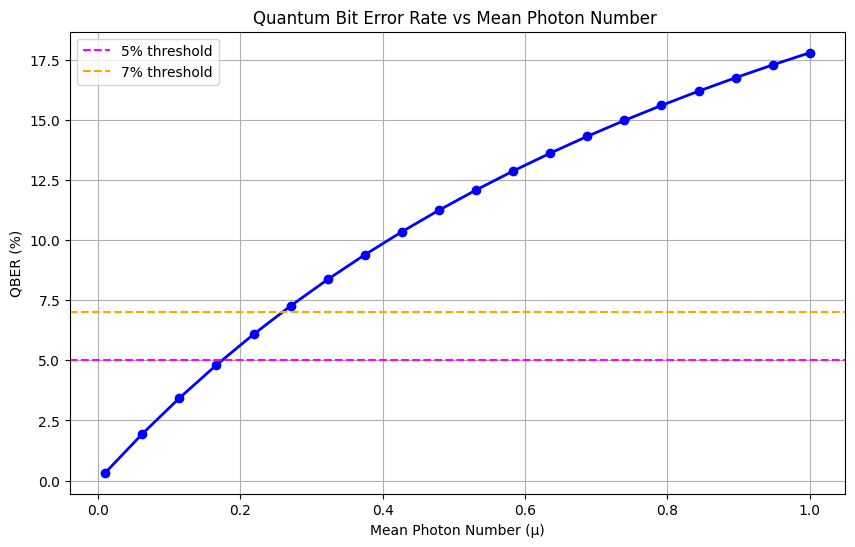

Optimal μ value for QBER in 5-7% range: 0.2184


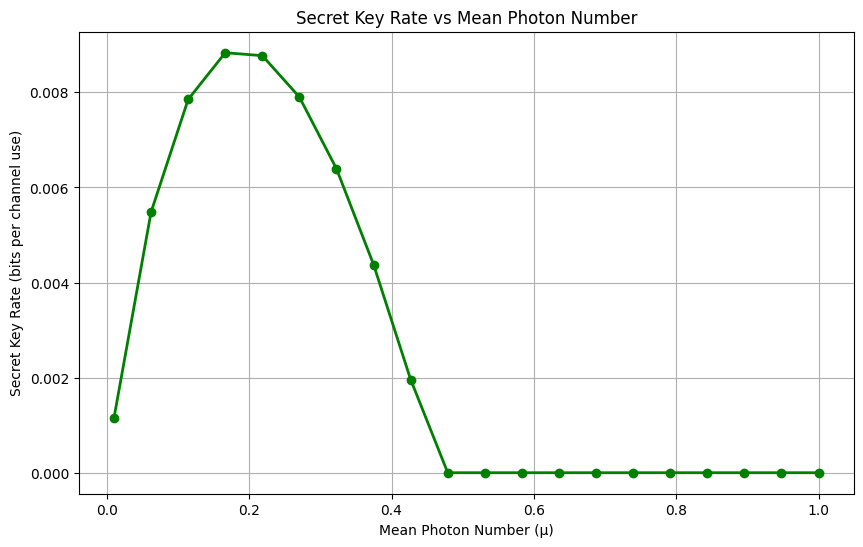

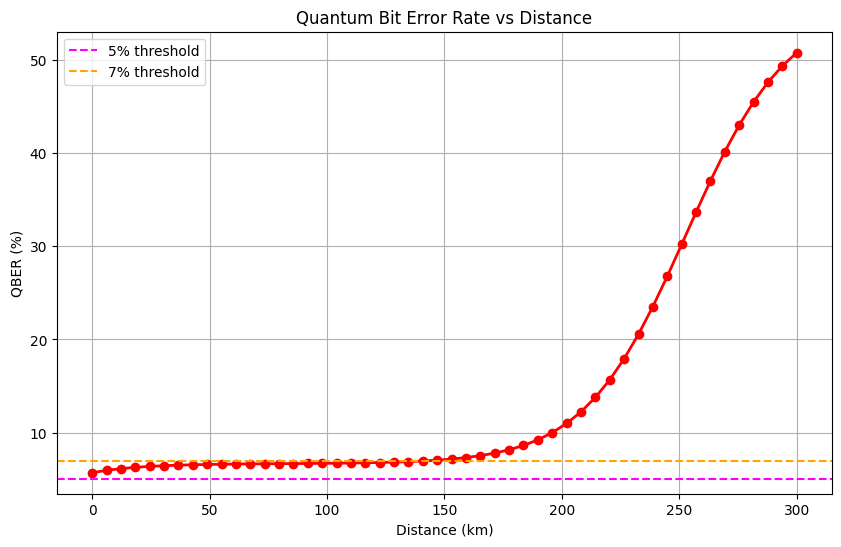

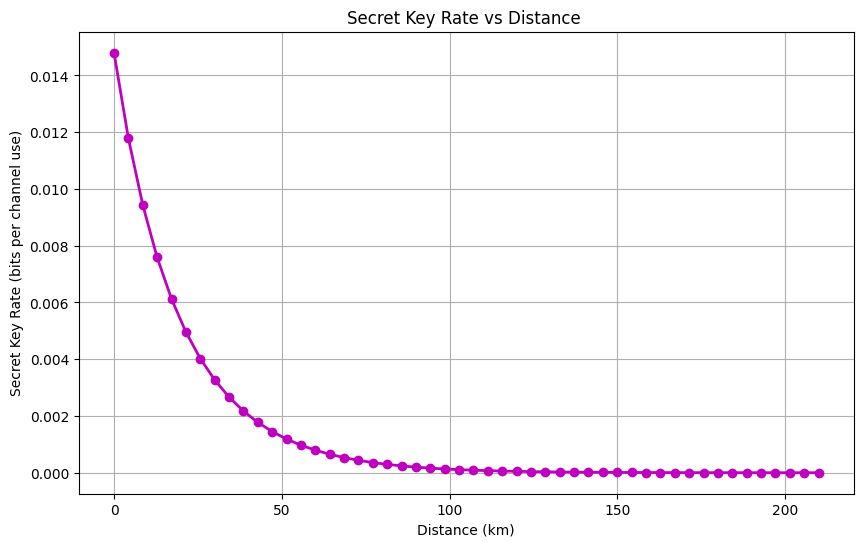

Max distance where QBER ≤ 11% (theoretical limit for secure key) is 199


In [3]:
run_simulation()